In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset into dataframe
df = pd.read_csv("Uber-Jan-Feb-FOIL.csv")

In [3]:
# Get the datatypes of each columns number of records in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [4]:
# Quick Overview of Dataset
df.head()

dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421
3                  B02682  1/1/2015              945   7679
4                  B02617  1/1/2015             1228   9537

In [5]:
df.tail()

dispatching_base_number       date  active_vehicles  trips
349                  B02764  2/28/2015             3952  39812
350                  B02617  2/28/2015             1372  14022
351                  B02682  2/28/2015             1386  14472
352                  B02512  2/28/2015              230   1803
353                  B02765  2/28/2015              747   7753

In [6]:
#The Date column is currently of type object. To ensure accurate representation and enable date-based operations, we will convert its data type to date.
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips                    354 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 11.2+ KB


In [8]:
# Extracting useful information from Date/Time
df['day'] = df['date'].dt.day
df

dispatching_base_number       date  active_vehicles  trips  day
0                    B02512 2015-01-01              190   1132    1
1                    B02765 2015-01-01              225   1765    1
2                    B02764 2015-01-01             3427  29421    1
3                    B02682 2015-01-01              945   7679    1
4                    B02617 2015-01-01             1228   9537    1
..                      ...        ...              ...    ...  ...
349                  B02764 2015-02-28             3952  39812   28
350                  B02617 2015-02-28             1372  14022   28
351                  B02682 2015-02-28             1386  14472   28
352                  B02512 2015-02-28              230   1803   28
353                  B02765 2015-02-28              747   7753   28

[354 rows x 5 columns]

In [9]:
df['month'] = df['date'].dt.month
df

dispatching_base_number       date  active_vehicles  trips  day  month
0                    B02512 2015-01-01              190   1132    1      1
1                    B02765 2015-01-01              225   1765    1      1
2                    B02764 2015-01-01             3427  29421    1      1
3                    B02682 2015-01-01              945   7679    1      1
4                    B02617 2015-01-01             1228   9537    1      1
..                      ...        ...              ...    ...  ...    ...
349                  B02764 2015-02-28             3952  39812   28      2
350                  B02617 2015-02-28             1372  14022   28      2
351                  B02682 2015-02-28             1386  14472   28      2
352                  B02512 2015-02-28              230   1803   28      2
353                  B02765 2015-02-28              747   7753   28      2

[354 rows x 6 columns]

In [11]:
df['hour'] = df['date'].dt.hour
df

dispatching_base_number       date  active_vehicles  trips  day  month  \
0                    B02512 2015-01-01              190   1132    1      1   
1                    B02765 2015-01-01              225   1765    1      1   
2                    B02764 2015-01-01             3427  29421    1      1   
3                    B02682 2015-01-01              945   7679    1      1   
4                    B02617 2015-01-01             1228   9537    1      1   
..                      ...        ...              ...    ...  ...    ...   
349                  B02764 2015-02-28             3952  39812   28      2   
350                  B02617 2015-02-28             1372  14022   28      2   
351                  B02682 2015-02-28             1386  14472   28      2   
352                  B02512 2015-02-28              230   1803   28      2   
353                  B02765 2015-02-28              747   7753   28      2   

     hour  
0       0  
1       0  
2       0  
3       0  
4       0  
..    ...  
349     0  
350     0  
351     0  
352     0  
353     0  

[354 rows x 7 columns]

In [12]:
df['day_name'] = df['date'].dt.day_name()
df

dispatching_base_number       date  active_vehicles  trips  day  month  \
0                    B02512 2015-01-01              190   1132    1      1   
1                    B02765 2015-01-01              225   1765    1      1   
2                    B02764 2015-01-01             3427  29421    1      1   
3                    B02682 2015-01-01              945   7679    1      1   
4                    B02617 2015-01-01             1228   9537    1      1   
..                      ...        ...              ...    ...  ...    ...   
349                  B02764 2015-02-28             3952  39812   28      2   
350                  B02617 2015-02-28             1372  14022   28      2   
351                  B02682 2015-02-28             1386  14472   28      2   
352                  B02512 2015-02-28              230   1803   28      2   
353                  B02765 2015-02-28              747   7753   28      2   

     hour  day_name  
0       0  Thursday  
1       0  Thursday  
2       0  Thursday  
3       0  Thursday  
4       0  Thursday  
..    ...       ...  
349     0  Saturday  
350     0  Saturday  
351     0  Saturday  
352     0  Saturday  
353     0  Saturday  

[354 rows x 8 columns]

In [13]:
df['day_of_week'] = df['date'].dt.dayofweek
df

dispatching_base_number       date  active_vehicles  trips  day  month  \
0                    B02512 2015-01-01              190   1132    1      1   
1                    B02765 2015-01-01              225   1765    1      1   
2                    B02764 2015-01-01             3427  29421    1      1   
3                    B02682 2015-01-01              945   7679    1      1   
4                    B02617 2015-01-01             1228   9537    1      1   
..                      ...        ...              ...    ...  ...    ...   
349                  B02764 2015-02-28             3952  39812   28      2   
350                  B02617 2015-02-28             1372  14022   28      2   
351                  B02682 2015-02-28             1386  14472   28      2   
352                  B02512 2015-02-28              230   1803   28      2   
353                  B02765 2015-02-28              747   7753   28      2   

     hour  day_name  day_of_week  
0       0  Thursday            3  
1       0  Thursday            3  
2       0  Thursday            3  
3       0  Thursday            3  
4       0  Thursday            3  
..    ...       ...          ...  
349     0  Saturday            5  
350     0  Saturday            5  
351     0  Saturday            5  
352     0  Saturday            5  
353     0  Saturday            5  

[354 rows x 9 columns]

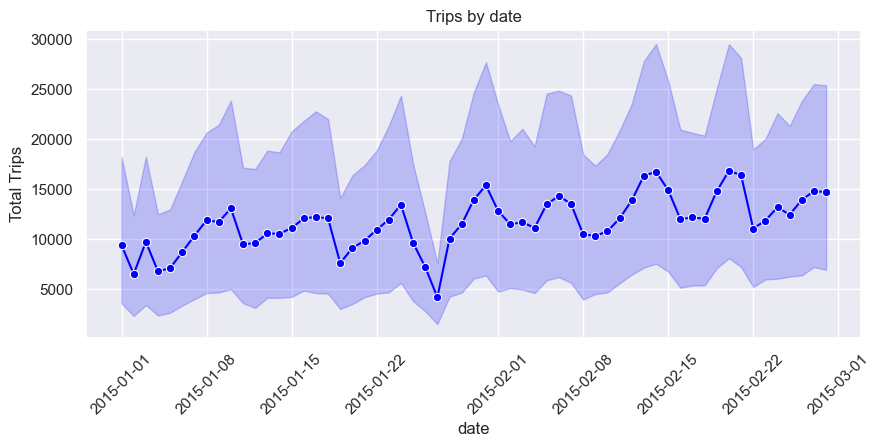

In [16]:
plt.figure(figsize = (10,4))
sns.lineplot(data = df, x = 'date',y = 'trips',color = 'blue', marker = 'o')
plt.title("Trips by date")
plt.xlabel("date")
plt.ylabel("Total Trips")
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

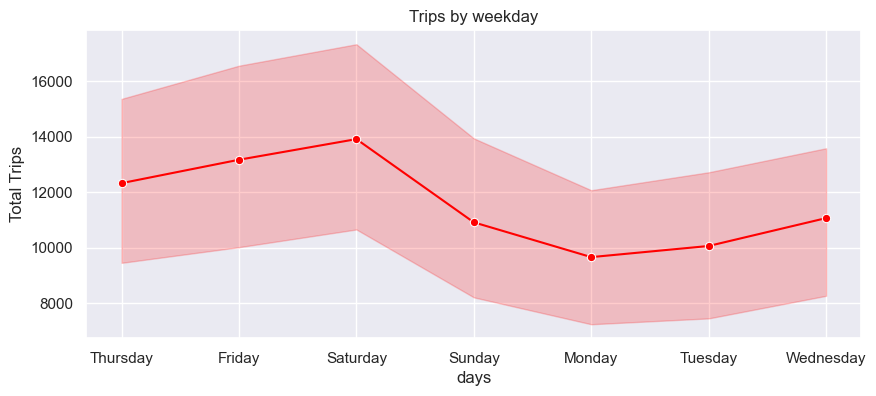

In [24]:
plt.figure(figsize = (10,4))
sns.lineplot(data = df, x = 'day_name',y = 'trips',color = 'red', marker = 'o')
plt.title("Trips by weekday")
plt.xlabel("days")
plt.ylabel("Total Trips")
plt.grid(True)
plt.show()

Insight: Weekday Trip Patterns

An analysis of trip frequency indicates that Uber sees the highest ride volumes on Thursdays, Fridays, and Saturdays, with Saturday showing the peak number of trips overall. This trend highlights a clear surge in demand during the late week and weekend, likely influenced by increased social, leisure, and nightlife activities.

These insights can guide strategic decisions in:

🛻 Driver deployment, especially on Saturdays

🎯 Targeted marketing and discount campaigns for midweek growth

💰 Optimizing dynamic pricing during weekend peak hours



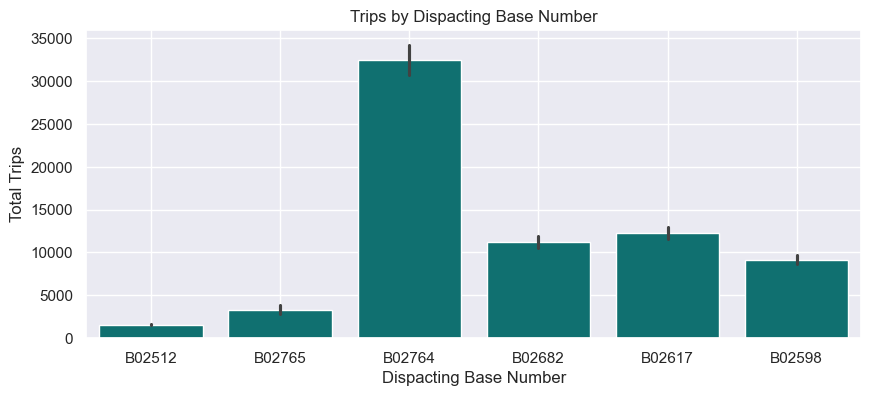

In [23]:
plt.figure(figsize = (10,4))
sns.barplot(data = df, x = 'dispatching_base_number',y = 'trips',color = 'teal')
plt.title("Trips by Dispacting Base Number")
plt.xlabel("Dispacting Base Number")
plt.ylabel("Total Trips")
plt.grid(True)
plt.show()

Insight: Trip Distribution by Dispatching Base

Upon analyzing the dispatch base performance, it was observed that Base Number B02764 recorded the highest number of trips, indicating it as the most active and possibly well-distributed base in terms of driver availability and customer demand.

In contrast, Base Number B02512 accounted for the lowest number of trips, suggesting limited operational coverage or lower demand in its service area.

We will focus on these points:

1. Operational audits of low-performing bases

2. Resource allocation and marketing focus on high-demand bases

3. Geo-strategic planning to balance trip volumes across dispatch centers

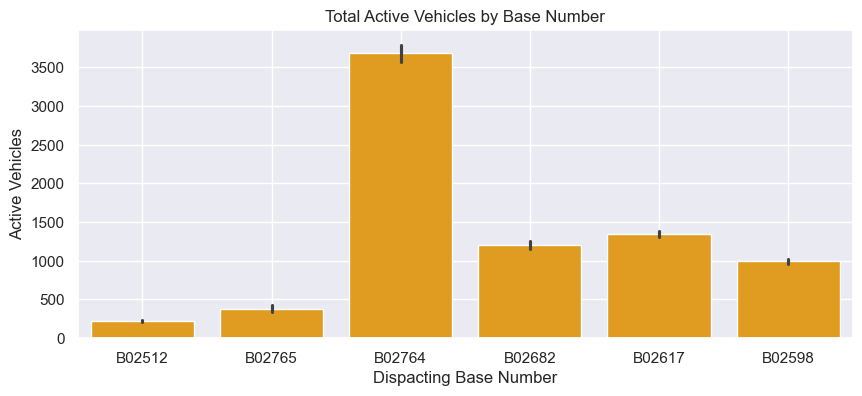

In [28]:
plt.figure(figsize = (10,4))
sns.barplot(data = df, x = 'dispatching_base_number',y = 'active_vehicles',color = 'Orange')
plt.title("Total Active Vehicles by Base Number")
plt.xlabel("Dispacting Base Number")
plt.ylabel("Active Vehicles")
plt.grid(True)
plt.show()

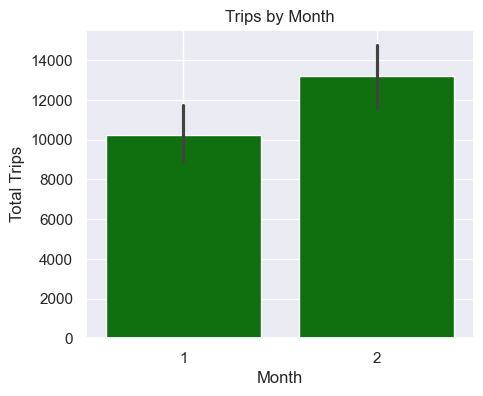

In [35]:
plt.figure(figsize = (5,4))
sns.barplot(data = df, x = 'month',y = 'trips',color = 'green')
plt.title("Trips by Month")
plt.xlabel("Month")
plt.ylabel("Total Trips")
plt.grid(True)
plt.show()

February Month has more trips than January

Text(0.5, 1.0, 'Distribution of trip')

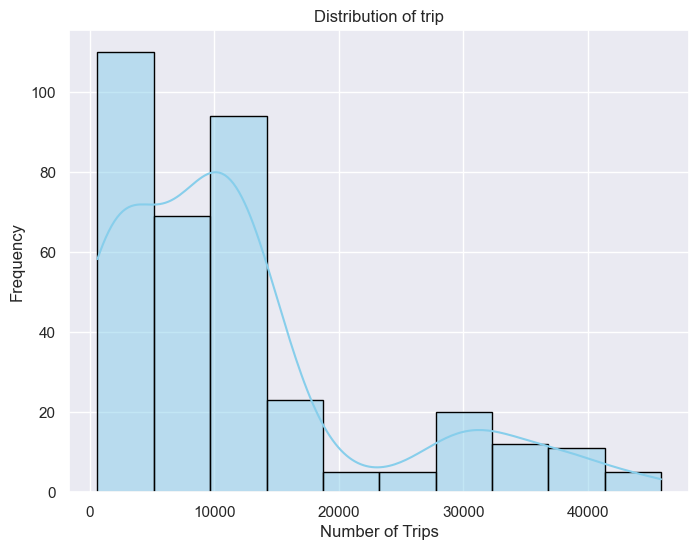

In [38]:
plt.figure(figsize=(8,6))
sns.histplot(df["trips"],bins=10,edgecolor='black',color='skyblue', kde = True)
plt.xlabel("Number of Trips")
plt.ylabel("Frequency")
plt.title("Distribution of trip")

Insight: Distribution of Uber Trips
The histogram reveals a right-skewed distribution in the number of trips across base IDs.
Most dispatch bases completed between 0 to 15,000 trips, with the highest frequency concentrated below 10,000 trips. Only a small number of bases registered exceptionally high trip volumes exceeding 30,000–40,000.

The KDE curve further confirms that the distribution is heavily weighted toward the lower range, suggesting that:

1.A few base stations are handling the bulk of operations, while the majority contribute relatively fewer trips.

2.There is a significant imbalance in dispatch workload, potentially due to geographic coverage, driver availability, or customer density.

 Implications:
1. Operational optimization may be needed to distribute trip loads more evenly.

2. Identify and scale high-performing bases to manage demand more efficiently.

3. Underutilized bases might require marketing efforts or logistical support.
